In [98]:
#import libraries
import pandas as pd
import bs4
from bs4 import BeautifulSoup
import requests
import csv
import matplotlib.pyplot as plt

In [87]:
# Serach function for item and pages(number of pages you want to scrap: pages should be < max no of pages shown in the website)
def get_url(search_item, pages):
    link= 'https://www.amazon.com/s?k={}&page={}&crid=2C1DDU2F76VAW&sprefix=computers%2Caps%2C270&ref=nb_sb_noss_1'    
    urls= []
    
    for i in range(2,pages):
        search_term= search_item.replace(' ','+')
        url= link.format(search_item, i)
        urls.append(url)
    return urls

In [88]:
# function to scrap each book and get description, rating and number of reviews
def scrape_record(item):
    #Product's description
    productinfo= item.h2.a
    title_and_description= productinfo.text.strip()
    
    #Product's price
    try:
        price_detail= item.find('span','a-price')
        price= price_detail.find('span', 'a-offscreen').text
    except AttributeError:
        return
    
    #Product's rating
    try:
        rating= item.i.text.strip()[:3]
    except AttributeError:
        rating= 'None'
        
    #Product's reiew count    
    try:
        review_count= item.find('span',{'class': 'a-size-base s-underline-text'}).text
    except AttributeError:
        review_count= 'None'
    
    record= (title_and_description, price, rating, review_count)
    
    return record

In [89]:
#scrap the pages loops over urls and scrap all the items before saving data in to csv,list of urls can  get by above url function
def scrape_all_pages(urls):
    records= [] 
    
    for url in urls:
        headers= {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
        page= requests.get(url, headers=headers) 
        soup= BeautifulSoup(page.content,'html.parser')

        results= soup.find_all('div',{'data-component-type':'s-search-result'})
        
        for item in results:
            record= scrape_record(item)
            if record:
                records.append(record)
                
    # Writing the rows into a csv file.
    
    with open("sqlbooks_data.csv", 'w', newline='', encoding='utf-8') as f:
        writer= csv.writer(f)
        writer.writerow(['title_and_description', 'Price', 'Rating', 'Review_count'])
        writer.writerows(records)
    return records

In [90]:
urls= get_url('sql',100)
records= scrape_all_pages(urls)

In [91]:
df= pd.read_csv('sqlbooks_data.csv')

In [92]:
#disply the dataframe
pd.set_option('display.max_rows', None)
df

,title_and_description,Price,Rating,Review_count
0,Python Programming and SQL: The Definitive Gui...,$22.09,4.9,489
1,SQL [6 BOOKS in 1]: The Ultimate Beginner to A...,$22.93,4.8,225
2,SQL QuickStart Guide: The Simplified Beginner'...,$24.99,4.6,"1,517"
3,"Engineers Survival Guide: Advice, tactics, and...",$29.99,4.5,212
4,The Microsoft Office 365 Bible: The Most Updat...,$27.75,4.4,703
5,Geospatial Analysis with SQL: A hands-on guide...,$39.99,4.7,10
6,SQL Database Reporting (Skills Today),$9.99,4.7,9
7,Learn SQL Quickly: A Beginner’s Guide to Learn...,$14.89,4.5,183
8,"SQL: 3 books 1 - The Ultimate Beginner, Interm...",$24.88,4.4,247
9,SQL: The Ultimate Simplified Beginner's Guide ...,$23.59,4.9,129


In [93]:
#sentimental analysis function
def sentiment_detection(sentence):
    Python_words = ('python', 'numpy', 'pandas', 'jupyter notebook','Programming')
    Anaytical_words = ('Data Analysis', 'Excel', 'Business Intelligence','Machine Learning')

    python = any(sentence.count(i) > 0 for i in Python_words)
    anaytics = any(sentence.count(i) > 0 for i in Anaytical_words)
    

    if python == anaytics == False:
        return "neutral topics"
    elif python != anaytics:
        return "python" if python else "anaytics"
    else:
        return "Mixed topics"

In [94]:
#apply the analysis to dataframe
df['related topics'] = df['title_and_description'].apply(sentiment_detection)

In [95]:
# print the dataframe after sentimental analysis
df

,title_and_description,Price,Rating,Review_count,related topics
0,Python Programming and SQL: The Definitive Gui...,$22.09,4.9,489,python
1,SQL [6 BOOKS in 1]: The Ultimate Beginner to A...,$22.93,4.8,225,neutral topics
2,SQL QuickStart Guide: The Simplified Beginner'...,$24.99,4.6,"1,517",neutral topics
3,"Engineers Survival Guide: Advice, tactics, and...",$29.99,4.5,212,neutral topics
4,The Microsoft Office 365 Bible: The Most Updat...,$27.75,4.4,703,anaytics
5,Geospatial Analysis with SQL: A hands-on guide...,$39.99,4.7,10,neutral topics
6,SQL Database Reporting (Skills Today),$9.99,4.7,9,neutral topics
7,Learn SQL Quickly: A Beginner’s Guide to Learn...,$14.89,4.5,183,neutral topics
8,"SQL: 3 books 1 - The Ultimate Beginner, Interm...",$24.88,4.4,247,python
9,SQL: The Ultimate Simplified Beginner's Guide ...,$23.59,4.9,129,python


In [108]:
# make a price range for chart
df['Price'] = df['Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Define price ranges and corresponding labels
price_ranges = [0, 15, 20, 25, 30, float('inf')]
price_labels = ['< $15', '$15 - $20', '$20 - $25', '$25 - $30', '> $30']

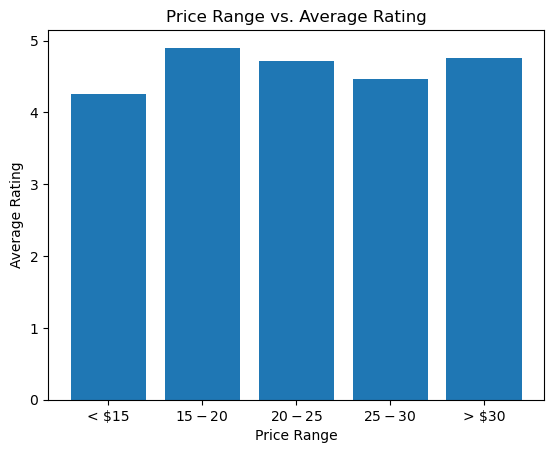

In [109]:
#display a chart of price range vs rating
df['Price_range'] = pd.cut(df['Price'], bins=price_ranges, labels=price_labels, right=False)
grouped_data = df.groupby('Price_range')['Rating'].mean()

# Set up the bar chart
plt.bar(price_labels, grouped_data)

# Customize the chart
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.title('Price Range vs. Average Rating')

# Display the chart
plt.show()

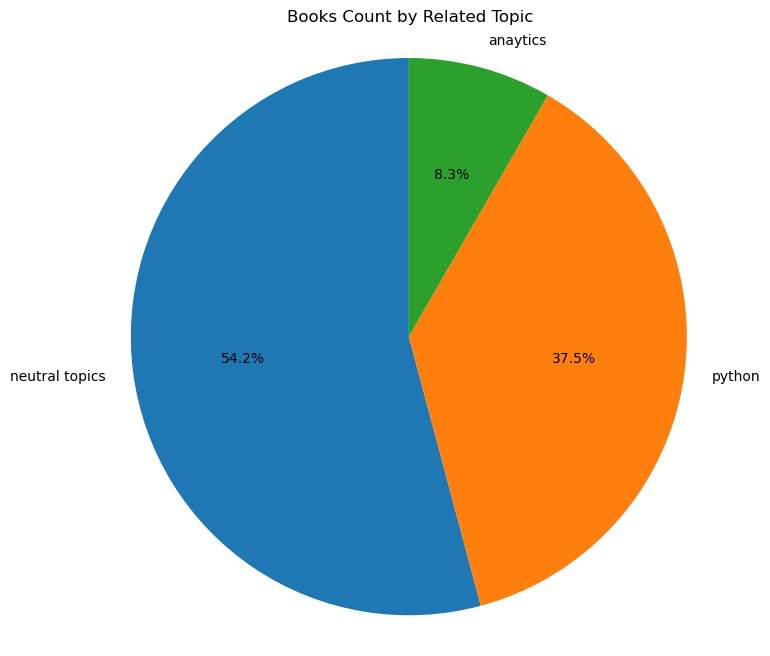

In [111]:
#display the pie chart of count of book by related topics
# Get the count of books for each related topic
topic_counts = df['related topics'].value_counts()

# Set up the pie chart
plt.figure(figsize=(8, 8))  # Optional: Adjust the figure size
plt.pie(topic_counts, labels=topic_counts.index, autopct='%1.1f%%', startangle=90)

# Customize the chart
plt.title('Books Count by Related Topic')

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()